In [11]:

#***********************************************************************************************************
# Simple R code (naive?) for eliciting a Beta(a,b) pdf for the probability of success in a Binomial experiment
#***********************************************************************************************************


elicit.beta <- function(alpha=0.05,n.sim.samples=10000) {
    # probability of success
    priormean = 0.3
    
    leftpriorint = 0.2
    rightpriorint = 0.4
    
    find_root = function(a) {
        b = (a - a * priormean) / priormean
        answer = pbeta(rightpriorint, a, b) - pbeta(leftpriorint, a, b) - (1 - alpha)
        return (answer)
    }
    
    priora = uniroot(find_root,lower=1,upper=100)$root
    priorb = (priora - priora*priormean)/priormean

    # examine/check the derived the distribution 
    cat("prior distribution is Beta(",priora,",",priorb,")", sep=c(""))
    cat("", sep=c("\n"))
    cat("prior mean=",priora/(priora+priorb), sep=c("","\n"))
    leftint<-qbeta((alpha/2),priora,priorb)
    rightint<-qbeta((1-alpha/2),priora,priorb)
    cat(paste((1-alpha)*100,"% credible interval =(",leftint,",",rightint,")",sep=""),sep=c("\n"))
    priorsample=rbeta(n.sim.samples,priora,priorb)
    hist(priorsample)

    # check probabilities for elicitation feedback
    rprob1<-sum(priorsample>0.2 & priorsample<0.8)/n.sim.samples
    intprob1<-pbeta(0.8,priora,priorb)-pbeta(0.2,priora,priorb)
    # how likely is for the probability to be between 0.2 and 0.8
    cat("probability within (0.2,0.8)=",rprob1," (using simulation)", sep=c("","\n"))
    cat("probability within (0.2,0.8)=",intprob1," (using integration)", sep=c("","\n"))

    rprob2<-sum(priorsample>0.9)/n.sim.samples
    intprob2<-1-pbeta(0.9,priora,priorb)
    # how likely is for the probability to be between 0.9 and 1
    cat("probability within (0.9,1)=",rprob2," (using simulation)", sep=c("","\n"))
    cat("probability within (0.9,1)=",intprob2," (using integration)", sep=c("","\n"))
}

# The code above can find a Beta distribution that fits lower and upper quartiles by setting
# elicit.beta(0.5,10000)

# There are beliefs for which this code works well, e.g.
# for prior mean=0.5 and prior 50% CI (0.4,0.6) or
# for priormean=0.12, prior 95% CI (0.001,0.5))

# There are other scenarios (e.g. priormean=0.12, 95% CI (0.1,0.5))
# where the code above is not satisfactory. 

prior distribution is Beta(16.62168,38.78392)
prior mean=0.3
90% credible interval =(0.203823048557214,0.40445782378147)
probability within (0.2,0.8)=0.956
 (using simulation)
probability within (0.2,0.8)=0.9571987
 (using integration)
probability within (0.9,1)=0
 (using simulation)
probability within (0.9,1)=0
 (using integration)


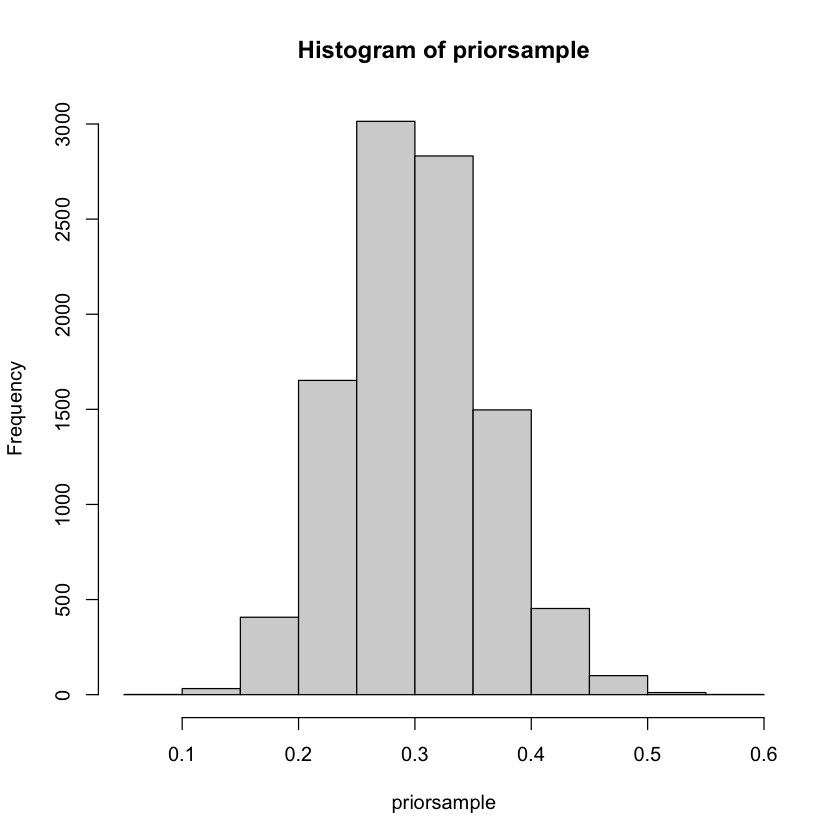

In [10]:
elicit.beta(alpha=0.1)

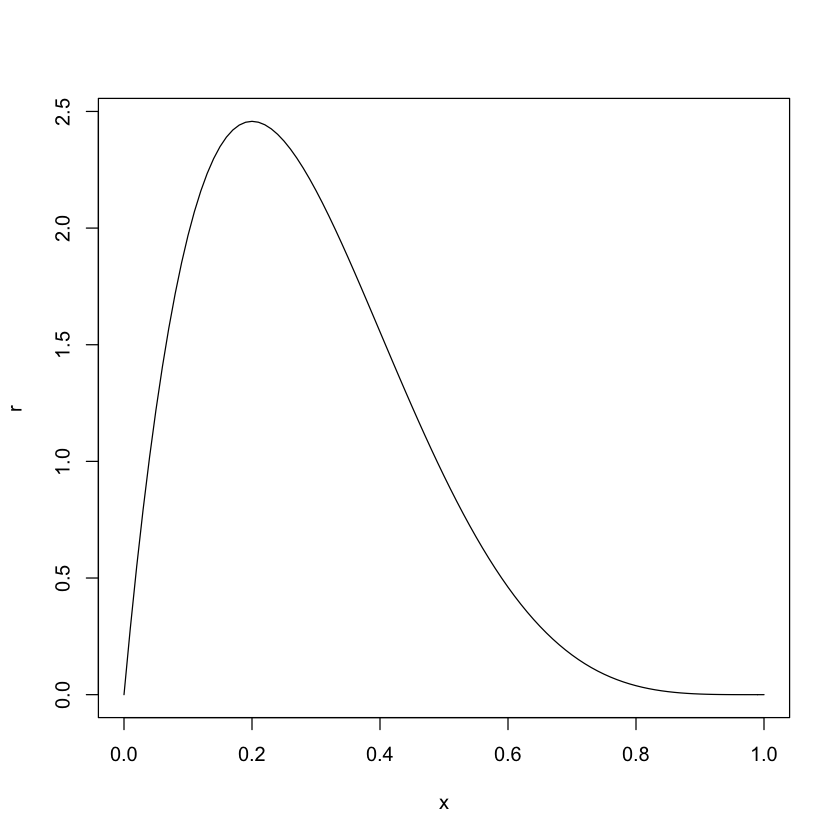

In [3]:
x=seq(0,1,0.01)
r = dbeta(x, 2, 5)
plot(x, r, type="l")